In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Need to gid rifd of underscores on Bar chart, also join in thzipcode data to see where the different communities are physically located

In [3]:
query = """
SELECT nc.npi,
        organization_name,
        first_name,
        last_name,
        nc.communityid,
        t.grouping,
        t.classification,
        t.specialization,
        location_address_postal_code AS zip
FROM npi_community AS nc
INNER JOIN npidata AS nd
USING(npi)
INNER JOIN taxonomy AS t
USING(taxonomy_code);

"""

In [4]:
with sqlite3.connect('./data/hop_db.sqlite') as db: 
    df = pd.read_sql(query, db)

In [5]:
graph_data_1 = (df['communityid']
              .value_counts()
              [:20]
              .rename_axis('Community_ID')
              .reset_index(name='Number_of_NPIs')
)

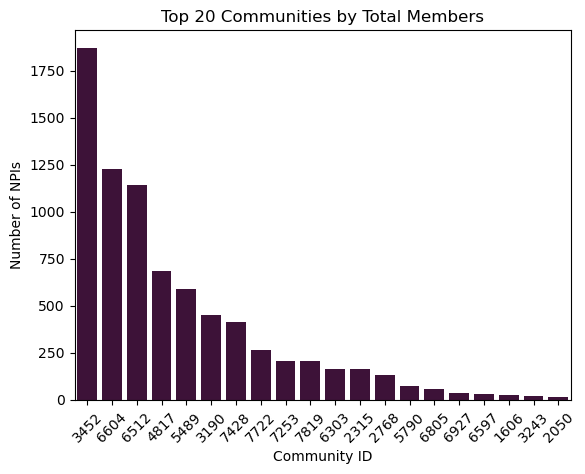

In [6]:
fig_1 = plt.figure()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

sns.barplot(
                data = graph_data_1,
                x = 'Community_ID',
                y = 'Number_of_NPIs',
                order = graph_data_1.sort_values('Number_of_NPIs', ascending=False).Community_ID,
                color = '#440B3D'
            )
plt.xticks(rotation=45)
plt.title('Top 20 Communities by Total Members')
plt.ylabel('Number of NPIs')
plt.xlabel('Community ID')
plt.show()

In [7]:
df.head()

,npi,organization_name,first_name,last_name,communityid,grouping,classification,specialization,zip
0,1922001957,None,RICHARD,PRESLEY,6507,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,None,37203
1,1013910892,None,EMIKO,LEJEUNE,2330,"Speech, Language and Hearing Service Providers",Audiologist,None,37043
2,1154324192,None,ELIZABETH,OLDFIELD,6507,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,None,37203
3,1235132408,None,LEWIS,BELLARDO,6507,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,None,37203
4,1225031461,None,VARALAXMI,DASARI,6507,Allopathic & Osteopathic Physicians,Radiology,Diagnostic Radiology,37203


I want to see how what each community ID has in common with each other. First lets look at the unique number of classifications represented within each comm. ID.

In [8]:
import plotly.express as px

df_2 = df[df['communityid'].isin(graph_data_1['Community_ID'][:5])]

fig_2 = px.treemap(df_2, path=[px.Constant("Top 5 Provider Groups in Nashville CBSA"), 'communityid', 'grouping', 'classification'])
fig_2.update_traces(root_color="lightgrey")
fig_2.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig_2.show()

fig_2.write_html("tree_plot.html")

In [27]:
data_2.loc[3452].dropna().sort_values(ascending=False)

37232    1340.0
37067     107.0
37203      62.0
37204      48.0
37212      48.0
Name: 3452, dtype: float64

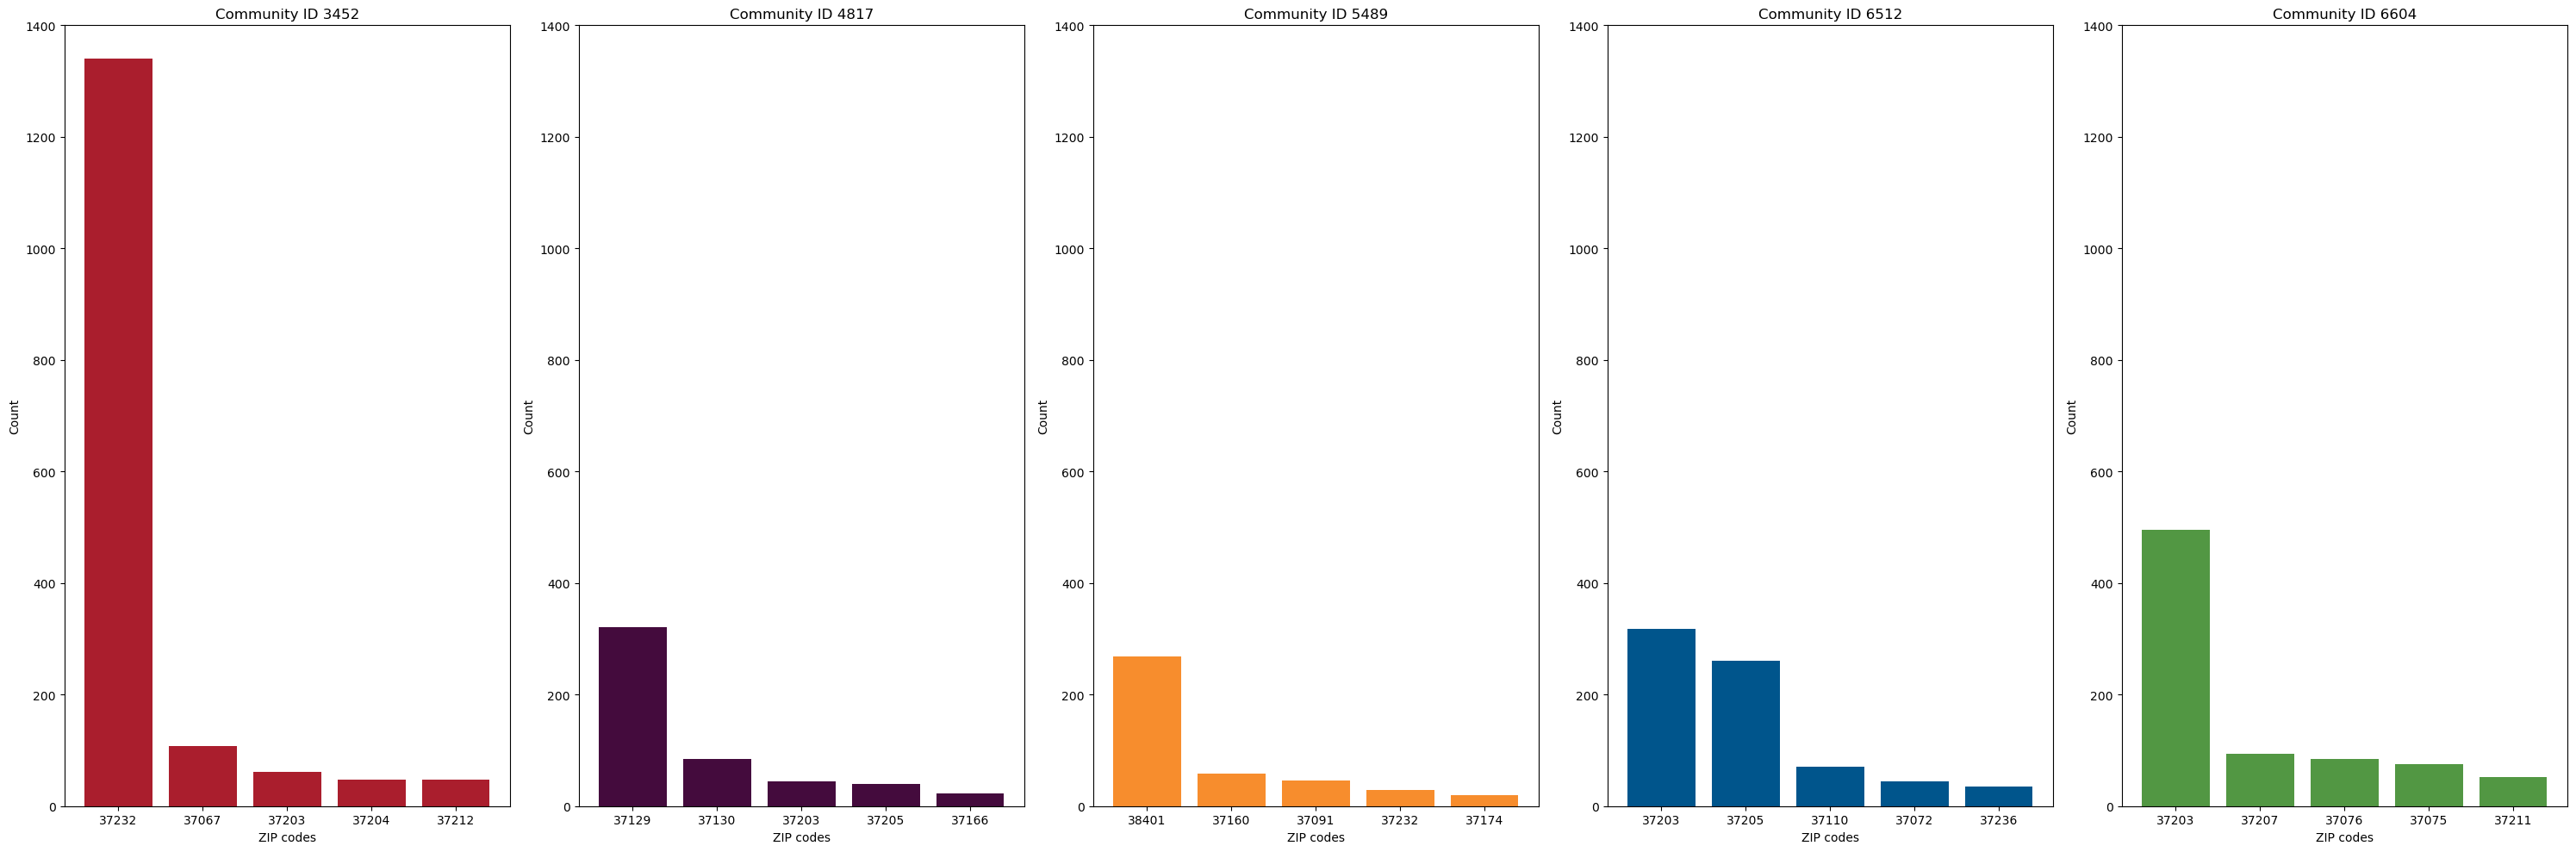

In [29]:
test = df_2[['communityid', 'zip']]
data_2 = (test.groupby('communityid')['zip']
            .apply(lambda x: x.value_counts().head(5))
            .unstack())


colors = ['#AA1E2D', '#440B3D', '#F78D2D', '#00558C', '#529743']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 10))

for i, communityid in enumerate(data_2.index):
    # row = i // 2
    # col = i % 2
    ax = axes[i]
    plot_data = data_2.loc[communityid].dropna().sort_values(ascending=False) # remove NaN values
    if plot_data.empty: # check if plot data is empty
        ax.axis('off') # remove plot if no data
    else:
        ax.bar(plot_data.index, plot_data, width=0.8, color=colors[i % len(colors)]) # specify color for each plot
        ax.set_title('Community ID {}'.format(communityid))
        ax.set_xlabel('ZIP codes')
        ax.set_ylabel('Count')
        ax.set_ylim([0, 1400])


plt.show()


